<a href="https://colab.research.google.com/github/maxF10R35/InteligenciaArtificial/blob/main/RedesConvolucionales/Clasificaci%C3%B3n_de_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal Convulucional para Clasificar Digitos

## importación de la Base de Datos

Primeramente, importamos la base de datos de numeros escritos a mano.

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [4]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

Exploramos el dataset...

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

Ahora revisamos los elementos del dataset

In [6]:
index = 0

In [7]:
image = digits.images[index]
label = digits.target[index]


In [8]:
print(image)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


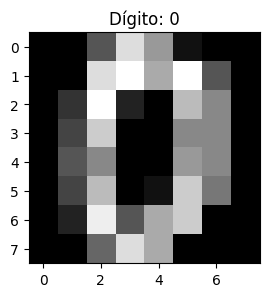

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray)
plt.title(f'Dígito: {label}')
plt.show()


## Procesamiento de los Datos

In [19]:
#Importación de los modulos
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#Se definen los conjuntos de entrenamiento y de prueba

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.2, random_state=42
)

#Se separan en 10 categorias o 10 digitos
# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [20]:
print(X_train.shape)
print(X_test.shape)

(1437, 64)
(360, 64)


In [21]:
print(y_train.shape)
print(y_test[100])

(1437, 10)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [22]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
print(reshaped_tensor)
#imagen o tensor con tamaño original

tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Imprimimos el tensor después de estandarizar los datos

In [24]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
# Redondeamos para tener una mejor visualizacion
reshaped_tensor =  tf.floor(reshaped_tensor * 100) / 100
print(reshaped_tensor)

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [25]:
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))

## Estrutura de la Rede Neuronal Convolucional

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3),
        activation='relu',
        input_shape=(8, 8, 1)
    ),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Tenemos entonces una red con una entrada de 8x8, una capa de convolución de 32 filtros y un filtro o kernel de 3x3, su función de activación es ReLu.
Tenemos después una capa para reducir el tamaño de la salida y una capa de flatten para aplanar los datos.
Para finalizar, tenemos una red neuronal multicapa con 128 neuronas en la capa oculta y 10 neuronas de salida con función de activación 'softmax'

In [28]:
from tensorflow.keras.optimizers import Adam #se importa el optimizador

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [30]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',# la función de pérdida
    metrics=['accuracy']#Se va a medir sobre la precisión
)

## Entrenamiento del Modelo

In [31]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)#guardamos en la variable history para ver su desarrollo posteriormente

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4189 - loss: 1.9671 - val_accuracy: 0.8715 - val_loss: 0.8585
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9039 - loss: 0.6371 - val_accuracy: 0.9236 - val_loss: 0.3619
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9434 - loss: 0.2570 - val_accuracy: 0.9236 - val_loss: 0.2302
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9671 - loss: 0.1641 - val_accuracy: 0.9410 - val_loss: 0.1803
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9754 - loss: 0.1085 - val_accuracy: 0.9444 - val_loss: 0.1559
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9869 - loss: 0.0769 - val_accuracy: 0.9549 - val_loss: 0.1357
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9922 - loss: 0.0623 - val_accuracy: 0.9618 - val_loss: 0.1180
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9929 - loss: 0.0548 - val_accuracy: 0.9653 - val_loss

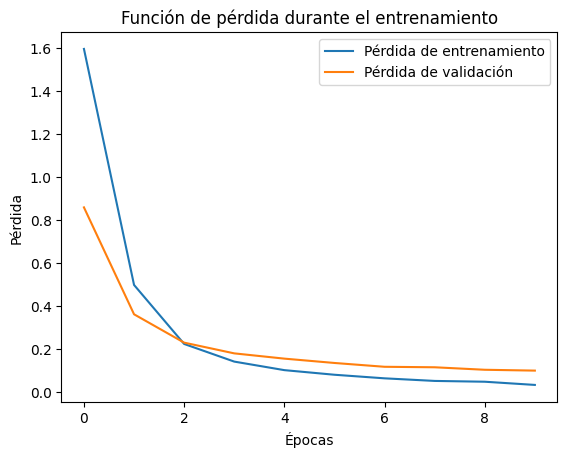

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()
#Se grafica la función de pérdida

Observamos que la función de perdida tiende a cero

## Evaluación

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9797 - loss: 0.0696
Loss: 0.06758404523134232, Accuracy: 0.9750000238418579


pérdida o error de 0.067 o del 6%, precisión del 97.5%

## Matriz de Confusión

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


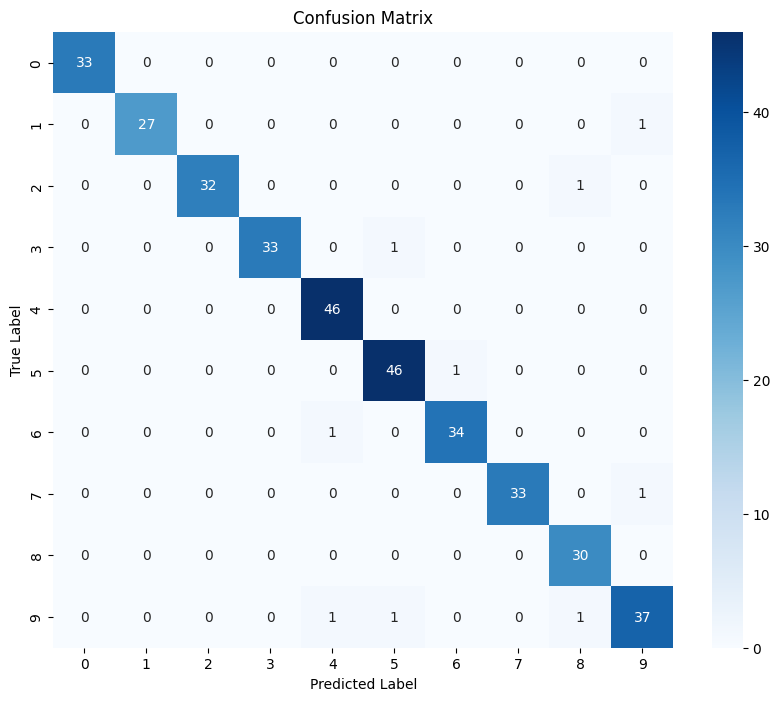

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 0.9642857142857143
Class 2: 0.9696969696969697
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 1.0
Class 9: 0.925


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')

El modelo clasifica muy bien los digitos, cada clase es clasificada con precisión de mas del 92%

# Evaluación con Imagen Externa

Primero importamos la imagen desde los archivos

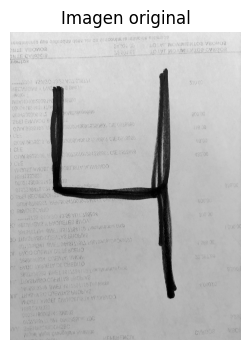

In [36]:
from PIL import Image
import matplotlib.pyplot as plt

# Cambia por el nombre de tu archivo
ruta = "/content/mi_numero.png"
# Escala de grises ("L")
img = Image.open(ruta).convert("L")

# mostrar la imagen
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Imagen original")
plt.axis("off")
plt.show()


Nuestro modelo solo acepta imagenes de 8x8 pixeles, así que debemos redimensionar la imagen.

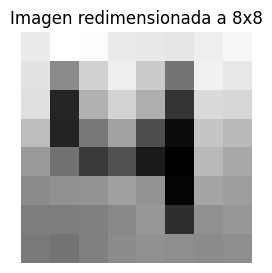

In [37]:
import matplotlib.pyplot as plt

# redimensionar a 8x8
img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

# mostrar imagen
plt.figure(figsize=(3, 3))
plt.imshow(img_resized, cmap="gray")
plt.title("Imagen redimensionada a 8x8")
plt.axis("off")
plt.show()

# opcional, guardamos la imagen si es necesario
img_resized.save("imagen_8x8.png")


Dado que la base de datos maneja en sus elementos valores desde 0 a 16, para que nuestra predicción sea certera, debemos escalar los valores de nuestra imagen para que se ajusten, además, en las imagenes de la base, el fondo es negro y el numero blanco, hay que realizar una inversión.

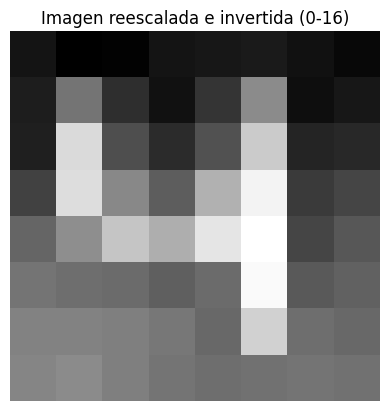

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# reescalar de 0-255 a 0-16 e invertir (fondo negro = 0)
img_array = np.array(img_resized).astype("float32")
img_array = 16 - (img_array / 255 * 16)

# mostrar imagen
plt.imshow(img_array, cmap="gray")
plt.title("Imagen reescalada e invertida (0-16)")
plt.axis("off")
plt.show()


Una vez adecuada a la forma de la base de datos, debemos estandarizar sus medidas para que tengan media de 0 y varianza de 1

In [42]:
from sklearn.preprocessing import StandardScaler

# normalizar
scaler = StandardScaler()
img_flat = img_array
img_scaled = scaler.fit_transform(img_flat)

# Dar forma (1,8,8) que es el input del modelo
img_tensor = img_scaled.reshape(1, 8, 8)

Para finalizar, evaluamos el modelo.

In [43]:
pred = model.predict(img_tensor)
digit = np.argmax(pred)
print("Predicción:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicción: 4


Observamos que el modelo predice un 4 y efectivamente es el numero de nuestra imagen.

In [44]:
pred = model.predict(img_array.reshape(1, 8, 8)) #imagen sin escalar
digit = np.argmax(pred)
print("Predicción:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicción: 1
